In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [2]:
data = pd.read_csv('crop2.csv')

In [3]:
data.head()

,rainfall,fav_temp,crop_label,crop_name
0,1750,25,1,rice
1,2000,27,1,rice
2,1800,29,1,rice
3,2450,31,1,rice
4,2900,34,1,rice


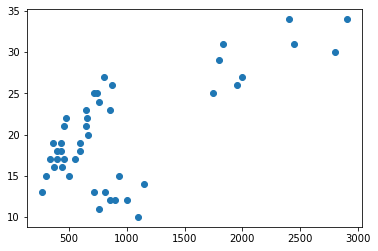

In [4]:
plt.scatter(data['rainfall'],data['fav_temp'])

In [5]:
X = data.iloc[:, :-2].values
y = data.iloc[:, -2].values

In [6]:
print(X)

[[1750   25]
 [2000   27]
 [1800   29]
 [2450   31]
 [2900   34]
 [ 600   18]
 [ 650   21]
 [ 855   23]
 [ 720   25]
 [ 800   27]
 [ 270   13]
 [ 300   15]
 [ 550   17]
 [ 600   19]
 [ 650   23]
 [ 400   18]
 [ 435   19]
 [ 460   17]
 [ 375   16]
 [ 500   15]
 [ 760   11]
 [ 810   13]
 [ 900   12]
 [1150   14]
 [ 932   15]
 [1832   31]
 [ 745   25]
 [ 660   22]
 [ 395   17]
 [ 860   12]
 [2800   30]
 [ 670   20]
 [ 340   17]
 [ 360   19]
 [1000   12]
 [2400   34]
 [ 765   24]
 [ 475   22]
 [ 440   16]
 [1100   10]
 [1950   26]
 [ 870   26]
 [ 460   21]
 [ 435   18]
 [ 720   13]]


In [7]:
print(y)

[1 1 1 1 1 2 2 2 2 2 3 3 3 3 3 4 4 4 4 4 5 5 5 5 5 1 2 3 4 5 1 2 3 4 5 1 2
 3 4 5 1 2 3 4 5]


## Splitting the dataset into the Training set and Test set

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [9]:
print(X_train)

[[ 870   26]
 [1800   29]
 [ 435   18]
 [ 375   16]
 [ 400   18]
 [ 900   12]
 [ 435   19]
 [1950   26]
 [ 720   25]
 [ 600   19]
 [ 600   18]
 [ 460   17]
 [ 340   17]
 [ 650   23]
 [2400   34]
 [ 855   23]
 [1000   12]
 [2000   27]
 [ 745   25]
 [ 550   17]
 [ 360   19]
 [ 932   15]
 [ 650   21]
 [1150   14]
 [ 765   24]
 [ 810   13]
 [ 500   15]
 [ 800   27]
 [1100   10]
 [ 460   21]
 [2450   31]
 [1750   25]
 [ 720   13]]


In [10]:
print(y_train)

[2 1 4 4 4 5 4 1 2 3 2 4 3 3 1 2 5 1 2 3 4 5 2 5 2 5 4 2 5 3 1 1 5]


In [11]:
print(X_test)

[[2800   30]
 [ 475   22]
 [ 660   22]
 [2900   34]
 [ 270   13]
 [1832   31]
 [ 395   17]
 [ 300   15]
 [ 440   16]
 [ 670   20]
 [ 860   12]
 [ 760   11]]


In [12]:
print(y_test)

[1 3 3 1 3 1 4 3 4 2 5 5]


## Feature Scaling

In [13]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [14]:
print(X_train)

[[0.25118483 0.66666667]
 [0.69194313 0.79166667]
 [0.0450237  0.33333333]
 [0.01658768 0.25      ]
 [0.02843602 0.33333333]
 [0.26540284 0.08333333]
 [0.0450237  0.375     ]
 [0.76303318 0.66666667]
 [0.18009479 0.625     ]
 [0.12322275 0.375     ]
 [0.12322275 0.33333333]
 [0.05687204 0.29166667]
 [0.         0.29166667]
 [0.14691943 0.54166667]
 [0.97630332 1.        ]
 [0.24407583 0.54166667]
 [0.31279621 0.08333333]
 [0.78672986 0.70833333]
 [0.19194313 0.625     ]
 [0.09952607 0.29166667]
 [0.00947867 0.375     ]
 [0.28056872 0.20833333]
 [0.14691943 0.45833333]
 [0.38388626 0.16666667]
 [0.2014218  0.58333333]
 [0.22274882 0.125     ]
 [0.07582938 0.20833333]
 [0.21800948 0.70833333]
 [0.36018957 0.        ]
 [0.05687204 0.45833333]
 [1.         0.875     ]
 [0.66824645 0.625     ]
 [0.18009479 0.125     ]]


In [15]:
print(X_test)

[[ 1.16587678  0.83333333]
 [ 0.06398104  0.5       ]
 [ 0.15165877  0.5       ]
 [ 1.21327014  1.        ]
 [-0.03317536  0.125     ]
 [ 0.707109    0.875     ]
 [ 0.02606635  0.29166667]
 [-0.01895735  0.20833333]
 [ 0.04739336  0.25      ]
 [ 0.1563981   0.41666667]
 [ 0.2464455   0.08333333]
 [ 0.19905213  0.04166667]]


## Training the K-NN model on the Training set

In [16]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 3)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

## Predicting the Test set results

In [17]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [3 3]
 [2 3]
 [1 1]
 [4 3]
 [1 1]
 [4 4]
 [4 3]
 [4 4]
 [2 2]
 [5 5]
 [5 5]]


## Making the Confusion Matrix

In [18]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[3 0 0 0 0]
 [0 1 0 0 0]
 [0 1 1 2 0]
 [0 0 0 2 0]
 [0 0 0 0 2]]


0.75

## Predicting a new result

In [19]:
print(classifier.predict(sc.transform([[2800,30]])))

[1]


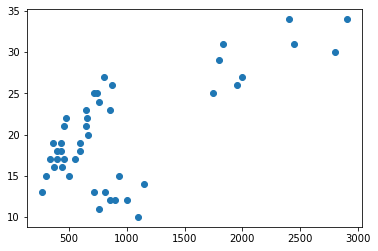

In [20]:
plt.scatter(data['rainfall'],data['fav_temp'])

In [40]:
crop_name = ['rice','maize','wheat','millet','rabi']

In [56]:
NumericCrop = classifier.predict(sc.transform([[760,11]]))
print("The most favorable crop to be grown in the given land is: " + crop_name[NumericCrop[0]-1].upper())

The most favorable crop to be grown in the given land is: RABI
